In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
%cd /content/drive/MyDrive/QI/
%ls

/content/drive/MyDrive/QI
archive.zip       download.png      pca.png            train_compiled.npz
casting_512x512/  k-means.png       test_compiled.npz  train.npz
casting_data/     pca_compiled.png  test.npz


In [ ]:
# load the npz file
data_path = '/content/drive/MyDrive/QI/train_compiled.npz'
train_data   = np.load(data_path, mmap_mode='r')
for k in train_data.files:
  print(k)

x_data
y_data


In [ ]:
x_data = train_data['x_data']
y_data = train_data['y_data']

In [ ]:
#perform KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(x_data)
centers = np.array(kmeans.cluster_centers_)
y_predict = kmeans.predict(x_data)

In [ ]:
#perform PCA
#PCA for x_data
pca = PCA(2)  # project to 2 dimensions
projected = pca.fit_transform(x_data)
print(x_data.shape)
print(projected.shape)


(11317, 10000)
(11317, 2)


In [ ]:
#PCA for centers
pca = PCA(2)  # project to 2 dimensions
projected_centers = pca.fit_transform(centers)
print(centers.shape)
print(projected_centers.shape)

(2, 10000)
(2, 2)


In [ ]:
#scatter plot
classes = []
for i in range(len(y_predict)):
    if y_predict[i]==1:
        classes.append('def_front')
    else:
        classes.append('ok_front')

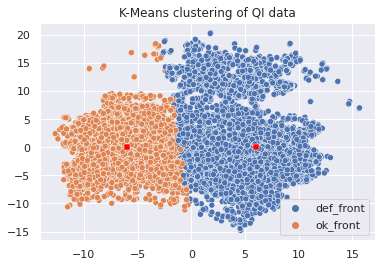

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.scatterplot(x=projected[:,0], y=projected[:,1], hue=classes).set_title("K-Means clustering of QI data")
sns.scatterplot(x=projected_centers[:,0], y =projected_centers[:,1], marker='s', color=(1.0,0,0),zorder=1,alpha=1)
#plt.scatter(centers[:,0], centers[:,1], marker="x", color='r')
plt.show()
plt.savefig('/content/drive/MyDrive/QI/kmeans.png')